In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation,BatchNormalization
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
#Matplotlib relies on the Pillow library to load image data.

# import the opencv library
import cv2


In [36]:
# Load age model
model2 = keras.models.load_model('untitled_age_45.h5')

Import Gender model

In [11]:
model1 = keras.models.load_model('untitled_gender_67.h5')

Capturing video image

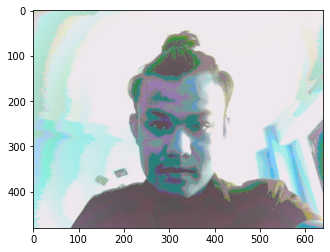

In [24]:
camera = cv2.VideoCapture(0)
for i in range(1):
    return_value, img = camera.read()
    cv2.imwrite('opencv'+str(i)+'.jpg', img)
camera.release()


plt.imshow(img)
plt.show()

image loading and checking

<class 'numpy.ndarray'>
[[0.36471927]]
male
age-group :0-10


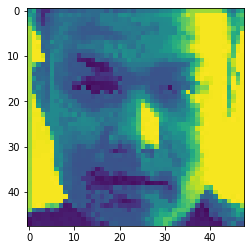

In [37]:
sample_image = cv2.imread('opencv0.jpg')
plt.imshow(sample_image)
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)
faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml').detectMultiScale(sample_image,1.2,4)

for (x,y,w,h) in faces:
    cv2.rectangle(sample_image,(x,y),(x+w,y+h),(0,0,255),2)
    roi_gray = sample_image[y:y+w,x:x+h]
    roi_gray = cv2.resize(roi_gray,(48,48))
    image_pixels = img_to_array(roi_gray)
    print(type(image_pixels))
    image_pixels = np.expand_dims(image_pixels,axis=0)
    image_pixels /=255
   
    predictions = model1.predict(image_pixels)
    print(predictions)
    if predictions[0][0]<=0.5:
        print('male')
    else:
        print('female')
    plt.imshow(roi_gray)

    predictions2 = model2.predict(image_pixels)
    predictions2 = np.argmax([predictions2])
    age_group = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>110']
    
    print('age-group :' + age_group[predictions2]) 

face detection using webcam
 

In [38]:
#defining
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame, frame Detection
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    
    # adding features in frame
    for (x,y,w,h) in faces:
        cv2.rectangle(sample_image,(x,y),(x+w,y+h),(0,0,255),2)
        roi_gray = sample_image[y:y+w,x:x+h]
        #resizing grey frame size to 48*48
        roi_gray = cv2.resize(roi_gray,(48,48))
        image_pixels = img_to_array(roi_gray)
        image_pixels = np.expand_dims(image_pixels,axis=0)
        image_pixels /=255
    
        predictions = model1.predict(image_pixels)
        if predictions[0][0]<=0.5:
            g ='gender : male ' + str(predictions)
        else:
            g = 'gender : female ' + str(predictions)
        

        predictions2 = model2.predict(image_pixels)
        predictions2 = np.argmax([predictions2])
        age_group = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>110']
        a = 'age-group : '+ str(age_group[predictions2]) 
        
        #Syntax: cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
        cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,0), 2)
        cv2.putText(frame, g, (x, y-30), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)
        cv2.putText(frame, a, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)
    
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break    
video_capture.release()
cv2.destroyAllWindows()  

oldcodes

In [10]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,0), 2)
        cv2.putText(frame, "name", (x, y), cv2.FONT_HERSHEY_SIMPLEX,
             0.75, (0, 255, 0), 2)
        # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()  

old codes

loading and resizing dimension of image

In [32]:
# # Image.open() can also open other image types
# WIDTH = 48
# HEIGHT = 48 
# img = Image.open("opencv1.jpg")
# # WIDTH and HEIGHT are integers
# resized_img = img.resize((WIDTH, HEIGHT))
# resized_img.save("resized_image.jpg")

# #greyscale
# img_grey = resized_img.convert('L')
# #ploting image
# plt.imshow(resized_img)
# plt.show()
# plt.imshow(img_grey)
# plt.show()

Testing captured images 

In [35]:
# value=np.asarray(img) 
# print(type(value),value)
# print(value.shape)

In [34]:
# value = value.flatten()
# print(value)



In [33]:
# gender predict
# image_pixels = img_to_array(image)
# print(image_pixels)

# image_pixels = np.expand_dims(image_pixels,axis=0)
# gend = model1.predict(image_pixels)
# print(gend)
# if gend[0][0] <=0.5:
#     print('male')
# else:
#     print('female')

# gender predict
# image_pixels = img_to_array(X_test[ii])
# image_pixels = np.expand_dims(image_pixels,axis=0)
# aged = model1.predict(image_pixels)
# print(aged)
# aged = np.argmax(aged)
# print(aged,'-index')
# age_group = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>110']
# print('age group: ',age_group[aged])